# Train model

In [1]:
# https://www.curiousily.com/posts/object-detection-on-custom-dataset-with-yolo-v5-using-pytorch-and-python/
#! config/download_weights.sh
#! python create_yolo_dataset_files.py

In [2]:
from main import run

[0/5]-[0/10] [Losses: x 0.4370, y 0.2735, w 5.3152, h 3.3211, conf 12.9685, cls 1.0386, total 23.3539, recall: 0.000, precision: 0.000]
[0/5]-[1/10] [Losses: x 0.4149, y 0.2667, w 3.9491, h 3.0262, conf 6.8267, cls 1.0362, total 15.5198, recall: 0.016, precision: 0.010]
[0/5]-[2/10] [Losses: x 0.4457, y 0.2302, w 4.0001, h 4.7881, conf 3.5872, cls 1.0382, total 14.0895, recall: 0.027, precision: 0.001]
[0/5]-[3/10] [Losses: x 0.4713, y 0.2697, w 2.8025, h 316.4628, conf 3.7315, cls 1.0359, total 324.7737, recall: 0.049, precision: 0.002]
[0/5]-[4/10] [Losses: x 0.3910, y 0.2790, w 2.4040, h 3.8411, conf 3.7109, cls 1.0322, total 11.6582, recall: 0.016, precision: 0.001]
[0/5]-[5/10] [Losses: x 0.4693, y 0.2542, w 39.8742, h 4.3921, conf 3.8779, cls 1.0256, total 49.8932, recall: 0.063, precision: 0.008]
[0/5]-[6/10] [Losses: x 0.4788, y 0.2779, w 4.8528, h 3.3246, conf 3.6442, cls 1.0283, total 13.6065, recall: 0.020, precision: 0.000]
[0/5]-[7/10] [Losses: x 0.3581, y 0.2234, w 2.2254

<Figure size 432x288 with 0 Axes>

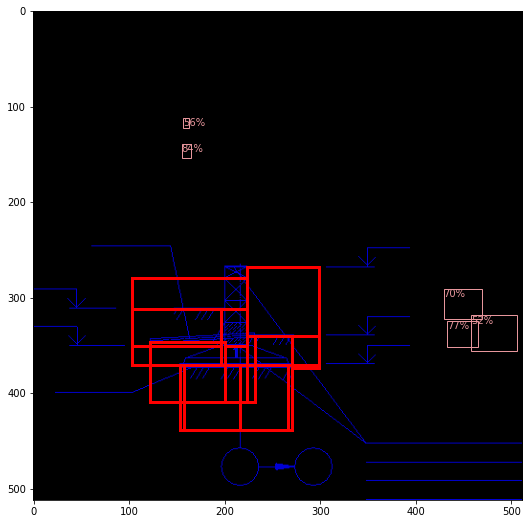

None

<Figure size 432x288 with 0 Axes>

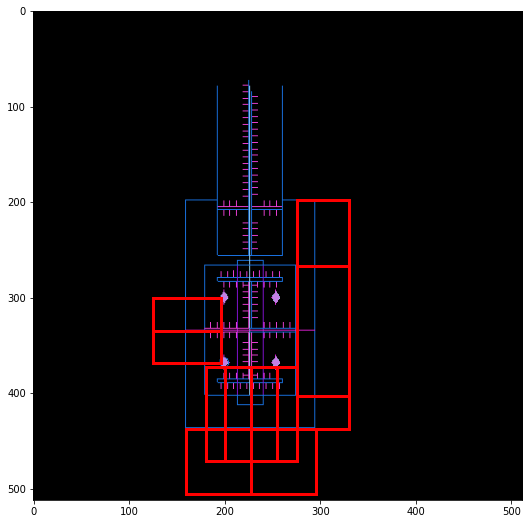

None

<Figure size 432x288 with 0 Axes>

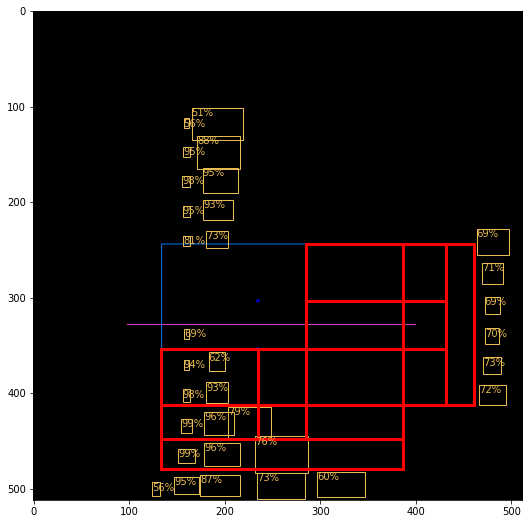

None

<Figure size 432x288 with 0 Axes>

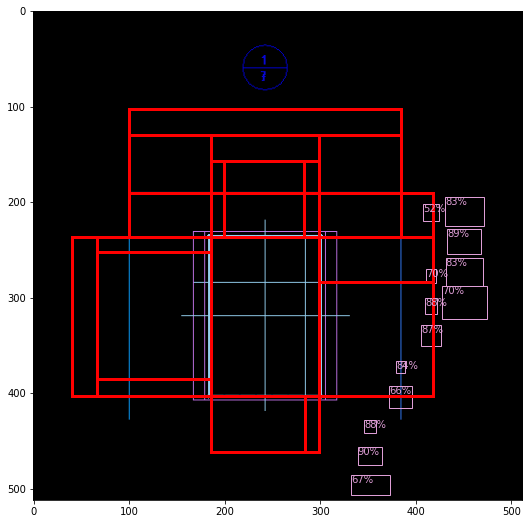

None

/pytorch/aten/src/ATen/native/cuda/Loss.cu:111: operator(): block: [16,0,0], thread: [32,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:111: operator(): block: [16,0,0], thread: [33,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:111: operator(): block: [16,0,0], thread: [34,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:111: operator(): block: [16,0,0], thread: [35,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:111: operator(): block: [16,0,0], thread: [36,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:111: operator(): block: [16,0,0], thread: [37,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:111: operator(): block: [16,0,0], thread: [38

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [3]:
run(use_cuda=True, batch_size=4, epochs=5)